# Linear Regression 이해하기 : 매우 중요

In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train = [1, 2, 3]

In [4]:
y_train = [2+1 +0.1, 4+1 -0.2, 6+1 +0.15]

Text(0, 0.5, 'Y')

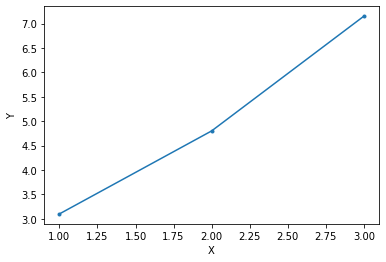

In [5]:
plt.plot(x_train, y_train,'.-')
plt.xlabel('X')
plt.ylabel('Y')


y = 2x +1

y = wx + b 

## 초기화, Initialization

In [6]:
w0 = 7; #바꾸어보세요
b0 = -10; #바꾸어보세요

## Parameter 설정

In [7]:
W = tf.Variable(w0*tf.ones([1]), name='weight')
b = tf.Variable(b0*tf.ones([1]), name='bias')

## Our hypothesis XW+b

In [8]:
hypothesis = x_train * W + b

## cost/loss function

In [9]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

## Optimizer 설정

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
#optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

## Launch the graph in a session

In [11]:
sess = tf.Session()

## Initializes global variables in the graph.

In [12]:
sess.run(tf.global_variables_initializer())

## RUN !

In [13]:
nb_epoch = 2000

In [14]:
for i in range(100):
  if i % 20 ==0:
    print(i)

0
20
40
60
80


In [15]:
vw = [] # empty list
vb = [] 
vcost = []

In [16]:
for step in range(nb_epoch+1):
    sess.run(train)

    w1 = sess.run(W)[0] # slope
    b1 = sess.run(b)[0] # bias
    cost1 = sess.run(cost)
    
    vw.append(w1)
    vb.append(b1)
    vcost.append(cost1)
    
    if step % 100 == 0: # 100번마다 결과 출력해보기 (안해도 되지만..)
        print(step, cost1, w1, b1)

0 17.451675 6.9743333 -9.979667
100 10.741469 5.8273573 -7.6769824
200 6.646544 5.0139985 -5.828029
300 4.1161265 4.3746243 -4.3745832
400 2.5524838 3.872019 -3.2320418
500 1.5862473 3.4769251 -2.3339002
600 0.98917216 3.1663456 -1.6278797
700 0.6202163 2.9222016 -1.0728832
800 0.39222336 2.7302818 -0.63660485
900 0.251338 2.5794156 -0.29365057
1000 0.16427943 2.4608212 -0.024057519
1100 0.11048248 2.3675952 0.18786728
1200 0.07723926 2.294311 0.35445926
1300 0.05669703 2.2367032 0.48541555
1400 0.044003133 2.1914184 0.58835924
1500 0.036159094 2.15582 0.6692827
1600 0.031311933 2.1278367 0.7328954
1700 0.028316746 2.1058393 0.7829006
1800 0.026465809 2.088547 0.8222095
1900 0.025322072 2.0749538 0.85311013
2000 0.0246153 2.0642676 0.877401


In [17]:
w1 = sess.run(W)[0] # slope
b1 = sess.run(b)[0] # bias
str1 = 'y={:.3}x + {:.3}'.format(w1, b1)
print(w1, b1)
print(str1)

2.0642676 0.877401
y=2.06x + 0.877


Text(0.5, 1.0, 'y=2.06x + 0.877')

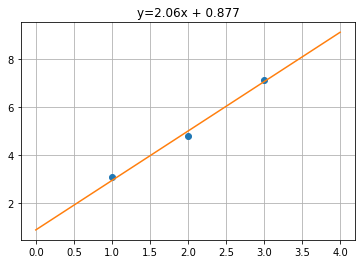

In [18]:
plt.figure(1)
plt.plot(x_train, y_train,'o')

x1 = np.min(x_train)-1, np.max(x_train)+1
y1 = np.dot(w1,x1) + b1
plt.plot(x1, y1)
plt.grid()
plt.title(str1)

Text(0, 0.5, 'b')

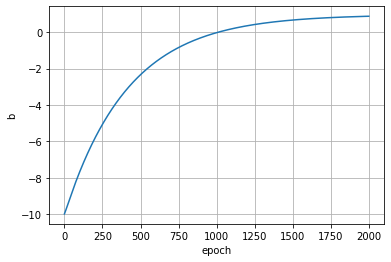

In [19]:
plt.plot(vb)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('b')


Text(0, 0.5, 'w')

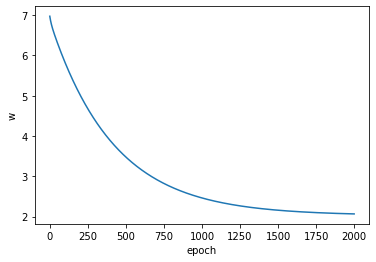

In [20]:
plt.plot(vw)
plt.xlabel('epoch')
plt.ylabel('w')

Text(0.5, 0, 'epoch')

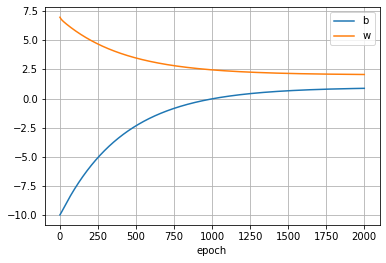

In [21]:
plt.plot(vb)
plt.plot(vw)
plt.legend(['b', 'w'])
plt.grid()
plt.xlabel('epoch')

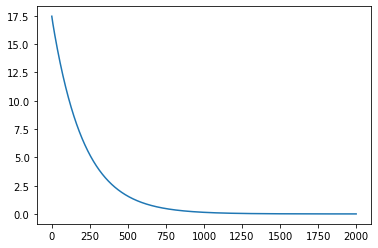

In [22]:
plt.plot(vcost)